# Libraries used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sys
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import ydf
import math

# Data import

In [2]:
ds_test = pd.read_csv("C:\\Users\\Matheus Poletto\\Desktop\\Cientista de Dados\\KAGGLE\\TITANIC\\test.csv")
ds_train = pd.read_csv("C:\\Users\\Matheus Poletto\\Desktop\\Cientista de Dados\\KAGGLE\\TITANIC\\train.csv")
ds_complete = pd.concat([ds_test, ds_train])

#print(ds_test)
#print(ds_train)

In [117]:
ds_complete

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


In [3]:
ds_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Variable codification

In [4]:
# Using LabelEncoder to transform Sex and Embarked to numerical
label_encoder = LabelEncoder()

ds_train['Sex'] = label_encoder.fit_transform(ds_train['Sex'])  # 0 to fem, 1 to masc
ds_train['Embarked'] = label_encoder.fit_transform(ds_train['Embarked'])  # Transforming 'Embarked'
ds_test['Sex'] = label_encoder.fit_transform(ds_test['Sex'])  # Doing the same in the test set
ds_test['Embarked'] = label_encoder.fit_transform(ds_test['Embarked'])  # Doing the same in the test set

# Variable check

In [5]:
#Since a lot of Cabin are NaN, we're not considering

In [6]:
columns = list(ds_train.columns)
columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<Axes: >

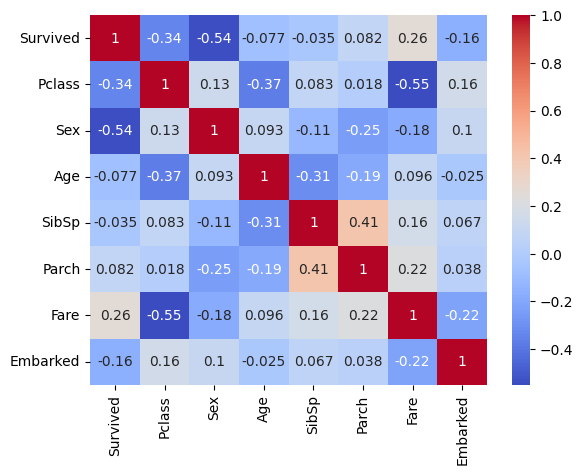

In [7]:
ds_train_corr = ds_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
corr = ds_train_corr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Value of variables, in order

-0.54  Survived vs sex = Strong negative correlation, females had higher survival
-0.34  Survived vs pclass = Passengers in higher classes were more likely to survive
0.26   Survived vs fare = Indicates that who paid higher fare had higher survival
-0.16  Survived vs embark = Weak correlation with the port of embarkation
-0.077 Survived vs age = Almost 0, meaning have low influence

The higher the age, higher the pclass

# Data treatment

## Verifing duplicates

In [8]:
ds_train.duplicated().sum()

0

## Verifing NA

In [9]:
ds_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Replacing NA AGE

In [10]:
# As we have NA in age, we'll replace it with the mean, taking in consideration the pclass, as the older passenger tend to be in higher classes
ds_train_pclass1 = ds_train[ds_train['Pclass'] == 1]
ds_train_pclass1_mean_age = ds_train_pclass1['Age'].mean().round(2)

ds_train_pclass2 = ds_train[ds_train['Pclass'] == 2]
ds_train_pclass2_mean_age = ds_train_pclass2['Age'].mean().round(2)

ds_train_pclass3 = ds_train[ds_train['Pclass'] == 3]
ds_train_pclass3_mean_age = ds_train_pclass3['Age'].mean().round(2)

print(ds_train_pclass1_mean_age)
print(ds_train_pclass2_mean_age)
print(ds_train_pclass3_mean_age)


38.23
29.88
25.14


In [11]:
# Changing Ages with NA to mean
ds_train.loc[(ds_train['Pclass'] == 1) & (ds_train['Age'].isna()), 'Age'] = ds_train_pclass1_mean_age
ds_train.loc[(ds_train['Pclass'] == 2) & (ds_train['Age'].isna()), 'Age'] = ds_train_pclass2_mean_age
ds_train.loc[(ds_train['Pclass'] == 3) & (ds_train['Age'].isna()), 'Age'] = ds_train_pclass3_mean_age



In [12]:
ds_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Droping irrelevant data

In [13]:
# We're dropping cabin since there's no pattern and there are a lot of NA
ds_train.drop('Cabin', axis=1, inplace=True)
ds_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.00,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.00,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.14,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.00,0,0,111369,30.0000,0


## Replacing Embarked with mode

In [14]:
# We're changing Embarked NA to the mode
mode = ds_train['Embarked'].mode()[0]
ds_train['Embarked'].fillna(mode, inplace=True)

C:\Users\Matheus Poletto\AppData\Local\Temp\ipykernel_25284\885321480.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds_train['Embarked'].fillna(mode, inplace=True)


<Axes: >

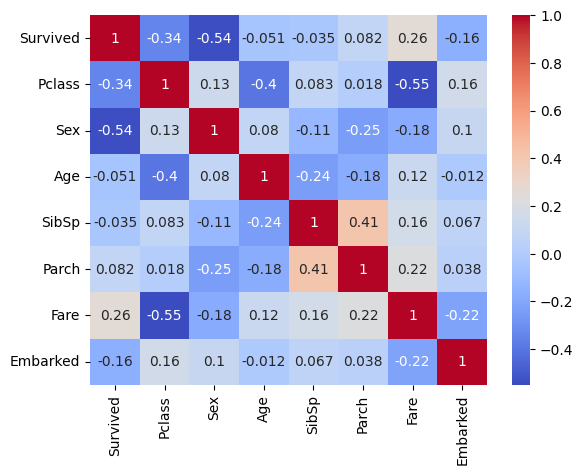

In [15]:
ds_train_corr = ds_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
corr = ds_train_corr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [16]:
# There were no changing in the correlation after the treatment

# Random Forest

## Testing the model

In [17]:
# Target is column survive
X = ds_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']]  # Features
y = ds_train['Survived']  # Target variable

# Split data in 20% as test and 80% as training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rfmodel = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfmodel.fit(X_train, y_train)

# Predicting the model in the test sample
y_pred = rfmodel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 84.36%


## Preparing the ds_test to receive the data

### Data treatment

In [18]:
ds_train.duplicated().sum()

0

In [19]:
ds_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
# As we have NA in age, we'll replace it with the mean, taking in consideration the pclass, as the older passenger tend to be in higher classes
ds_test_pclass1 = ds_test[ds_test['Pclass'] == 1]
ds_test_pclass1_mean_age = ds_test_pclass1['Age'].mean().round(2)

ds_test_pclass2 = ds_test[ds_test['Pclass'] == 2]
ds_test_pclass2_mean_age = ds_test_pclass2['Age'].mean().round(2)

ds_test_pclass3 = ds_test[ds_test['Pclass'] == 3]
ds_test_pclass3_mean_age = ds_test_pclass3['Age'].mean().round(2)

print(ds_test_pclass1_mean_age)
print(ds_test_pclass2_mean_age)
print(ds_test_pclass3_mean_age)

40.92
28.78
24.03


In [21]:
# Changing Ages with NA to mean
ds_test.loc[(ds_test['Pclass'] == 1) & (ds_test['Age'].isna()), 'Age'] = ds_test_pclass1_mean_age
ds_test.loc[(ds_test['Pclass'] == 2) & (ds_test['Age'].isna()), 'Age'] = ds_test_pclass2_mean_age
ds_test.loc[(ds_test['Pclass'] == 3) & (ds_test['Age'].isna()), 'Age'] = ds_test_pclass3_mean_age

In [22]:
# We're dropping cabin since there's no pattern and there are a lot of NA
ds_test.drop('Cabin', axis=1, inplace=True)
ds_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.50,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.00,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.00,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,24.03,0,0,A.5. 3236,8.0500,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.00,0,0,PC 17758,108.9000,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.50,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,3,"Ware, Mr. Frederick",1,24.03,0,0,359309,8.0500,2


In [23]:
# We'll need to do additional replacing to fare, since there's NA
ds_test_fare_mean = ds_test['Fare'].mean()
ds_test_fare_mean = math.ceil(ds_test_fare_mean)
ds_test_fare_mean

36

In [24]:
ds_test['Fare'] = ds_test['Fare'].fillna(ds_test_fare_mean)
ds_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Exporting the model

In [25]:
# Exporting to test

# Use full training set for model training
X_full = ds_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']]  # Features
Y_full = ds_train['Survived']  # Target variable

X_test = ds_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Ensure the test set has the same columns as the training set (add any missing columns)
X_test = X_test.reindex(columns=X_full.columns, fill_value=0)

# Train the model on the full dataset
#rfmodel = RandomForestClassifier(n_estimators=100, random_state=42)
#rfmodel.fit(X_full, Y_full)

# Make predictions on the actual test dataset
y_pred = rfmodel.predict(X_test)

# Export the result
output = pd.DataFrame({'PassengerId': ds_test.PassengerId, 'Survived': y_pred})
#output.to_csv('submissionrev8.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Yggdrasil Decision Forests

In [26]:
ds_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.00,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.00,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.14,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.00,0,0,111369,30.0000,0


In [107]:
tuner = ydf.RandomSearchTuner()
tuner.choice("shrinkage", [0.04])
tuner.choice("subsample", [0.8])
tuner.choice("max_depth", [20])
tuner.choice("num_candidate_attributes_ratio", [0.9])
tuner.choice("validation_ratio", [0.2])
tuner.choice("num_trees", [300])
tuner.choice("sparse_oblique_num_projections_exponent", [1.6])



tuner1 = ydf.RandomSearchTuner(num_trials=50, automatic_search_space=True)

In [43]:
templates = ydf.GradientBoostedTreesLearner.hyperparameter_templates()
print(templates)

{'better_defaultv1': HyperparameterTemplate(name='better_default', version=1, parameters={'growing_strategy': 'BEST_FIRST_GLOBAL'}, description='A configuration that is generally better than the default parameters without being more expensive.'), 'benchmark_rank1v1': HyperparameterTemplate(name='benchmark_rank1', version=1, parameters={'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}, description='Top ranking hyper-parameters on our benchmark slightly modified to run in reasonable time.')}


In [108]:
ydf_model = ydf.GradientBoostedTreesLearner(
    label="Survived",
    tuner=tuner, 
    split_axis="SPARSE_OBLIQUE", 
    sparse_oblique_normalization="MIN_MAX", 
    #sparse_oblique_num_projections_exponent=1.0,
    categorical_algorithm = "RANDOM",
    use_hessian_gain=True,
    #validation_ratio = 0.2,
    #features=[ydf.Feature("Sex", ydf.Semantic.CATEGORICAL), ("SibSp", ydf.Semantic.CATEGORICAL), ("Parch", ydf.Semantic.CATEGORICAL), ("Embarked", ydf.Semantic.CATEGORICAL) ], include_all_columns=True
    #num_candidate_attributes_ratio=0.8,
    #min_examples=20,
    #growing_strategy="BEST_FIRST_GLOBAL"
    
    ).train(ds_train)


Train model on 891 examples
Model trained in 0:00:01.158899


In [109]:
ydf_model.describe()

trial,score,duration,shrinkage,subsample,max_depth,num_candidate_attributes_ratio,validation_ratio,num_trees,sparse_oblique_num_projections_exponent
0,-0.632654,1.15246,0.04,0.8,20,0.9,0.2,300,1.6


In [ ]:
ydf_model.analyze(ds_train)

In [124]:
accuracy_ydf = ydf_model.evaluate(ds_train)

# Show the full evaluation report
print("Full evaluation report:")
accuracy_ydf

Full evaluation report:


Label \ Pred,0,1
0,537,10
1,12,332


In [112]:
ydf_pred = ydf_model.predict(ds_test)
ydf_pred = ydf_pred.round(0).astype(int)
ydf_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [113]:
# Export the result
output = pd.DataFrame({'PassengerId': ds_test['PassengerId'], 'Survived': ydf_pred})
output.to_csv('submissionrev21.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
